# Майнор по Анализу Данных, Группы ИАД-3 и ИАД-4
## Домашнее задание №3 
## Обо всем понемножку
Задание составлено с использованием материалов А. Шестакова

<hr\>
**Общая информация**

В этом задании вы вкратце пройдете цикл решения задачи анализа данных от первичного знакомства с данными до некоторого приемлемого качества решения задачи. Девиз задания - все интерпретируемо! Мы будем визуализировать результаты работы всех используемых методов из sklearn, чтобы понять, как они работают с нашими данными. Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

**Срок сдачи:** 11 июня 2017, 9:00 <br\>

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [ИАД-X] Фамилия Имя ДЗ-3 **<br\>
X = 3 или 4

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Загрузим файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [3]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [4]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

FileNotFoundError: File b'data/table_data.csv' does not exist

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
td = table_data
td.fillna(0)
td.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [6]:
#поменяем индексы на id, потому что иначе возникнут трудности с рисованием листиков
td.index = pd.DataFrame(td['id'])

In [7]:
td.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
1,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
2,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
3,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
5,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
6,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [8]:
#удалим столбик с id, потому что он больше не нужен

In [9]:
#del td['id']

## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
random_seed = 42

In [12]:
# кодируем столбец
le = LabelEncoder()
le.fit(td['species'])
y = le.transform(list(td['species']))
type(y), len(y)

(numpy.ndarray, 990)

In [13]:
y

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [14]:
# записываем значения в переменную Х
X = td[td.columns[2:]].values
type(X), len(X)

(numpy.ndarray, 990)

In [1]:
X.shape

NameError: name 'X' is not defined

In [15]:
X

array([[ 0.007812,  0.023438,  0.023438, ...,  0.004883,  0.      ,
         0.025391],
       [ 0.005859,  0.      ,  0.03125 , ...,  0.000977,  0.039062,
         0.022461],
       [ 0.005859,  0.009766,  0.019531, ...,  0.      ,  0.020508,
         0.00293 ],
       ..., 
       [ 0.001953,  0.003906,  0.      , ...,  0.027344,  0.      ,
         0.001953],
       [ 0.      ,  0.      ,  0.046875, ...,  0.      ,  0.001953,
         0.00293 ],
       [ 0.023438,  0.019531,  0.03125 , ...,  0.023438,  0.025391,
         0.022461]])

In [16]:
# разбиваем данные на обучающую и контрольную выборку
sss = StratifiedShuffleSplit
sss = sss(n_splits=1, test_size=0.2, random_state=random_seed)

In [17]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [207 252  10 865 497 532  68 447 558 826  84 293 546 100  92  78 495 163
 946 275 633 774 235   0 657 870 337 691 422 227  86 250 306 290 496   8
 219 270 767 693 577 158 802 599 598 553 136 378 681 271 836 542 882 212
 614 676 890 588 930 901 813 300 358 264 988  21 955 114 259 971 587 727
 574 533 357  42  19 106 214 128 431 831  41  26 887 881 362 855 769 400
 223 352 596 894  48 460 434 654 733 538 724 825 530 556 391 660 753 397
 817 869 153 112 707 481  80 673 860 506 182 828 429 432 461 229 475 612
 875 156 947 851 584 240 545 760 914 722 604 601   1 975 984   2 245 861
  72 307 682 480 491 517 716 503 917 411 770 623 232 303 842 190  17 554
 218 501 797 957 862 810 502 785 355  38 967  16  53 396 256 260 367 651
 265 468   4  11 714 840 830 494 936 222 857 592  97 365 567 342 330 507
 689 896 285 664 959 800 819 582 773 737 717 150 383 948 695 144 739 748
 273 743 884 191   3 302 608 600 731 134 576 220 621 206 605 446 406 317
 866  57 708 787 266 786 652 436 248 353 713

In [18]:
lst_train = list(train_index)
lst_test = list(test_index)
len(lst_train), len(lst_test)

(792, 198)

In [19]:
#сохраняем индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx
#ну вообще-то наверное этого можно было и не делать, потому что я еще в начале поменяла индексы на id
train_idx = []
test_idx = []

for ltr in lst_train:
    idx_tr = td.id[ltr:ltr+1]
    train_idx.append(int(idx_tr))
    
for lt in lst_test:
    idx_t = td.id[lt:lt+1]
    test_idx.append(int(idx_t))
    
print(len(train_idx))
print(len(test_idx))  

792
198


Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [20]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


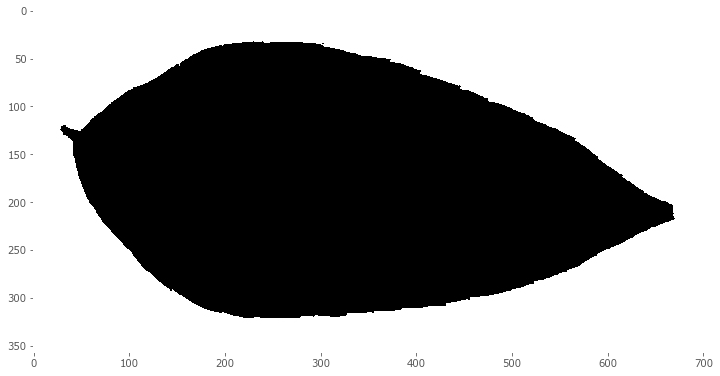

In [21]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции scipy.misc.imresiz:

In [22]:
from scipy.misc import imresize

In [23]:
img_resized = imresize(img, (100, 100))

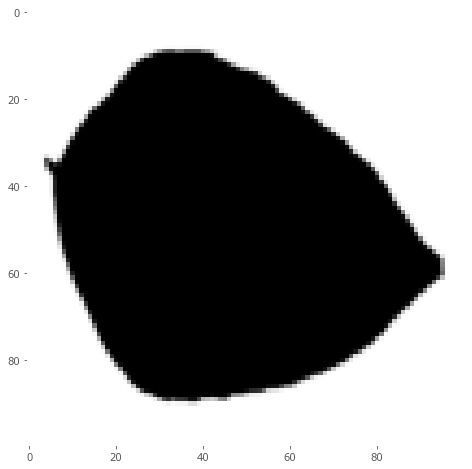

In [24]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [25]:
pictures = [str(s)+'.jpg' for s in range(1,1585)]
pictures[-1]

'1584.jpg'

In [26]:
imgs_train = []
imgs_test = []

#загружаем и преобразуем изображения для тестовой выборки
for idx_tr in train_idx:
    for p in pictures:
        if p[:-4] == str(idx_tr):
            filepath = os.path.join(IMG_DIR, p)
            img = plt.imread(filepath)
            img_resized = imresize(img, (100, 100))
            imgs_train.append(np.ravel(img_resized))

In [27]:
#загружаем и преобразуем изображения для контрольной выборки            
for idx_t in test_idx:
    for p in pictures:
        if p[:-4] == str(idx_t):
            filepath = os.path.join(IMG_DIR, p)
            img = plt.imread(filepath)
            img_resized = imresize(img, (100, 100))
            imgs_test.append(np.ravel(img_resized))

In [28]:
imgs_train = np.array(imgs_train)

In [29]:
len(imgs_train)

792

In [30]:
#это мы проверили, что в массиве есть не только нолики
(imgs_train != 0).any()

True

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

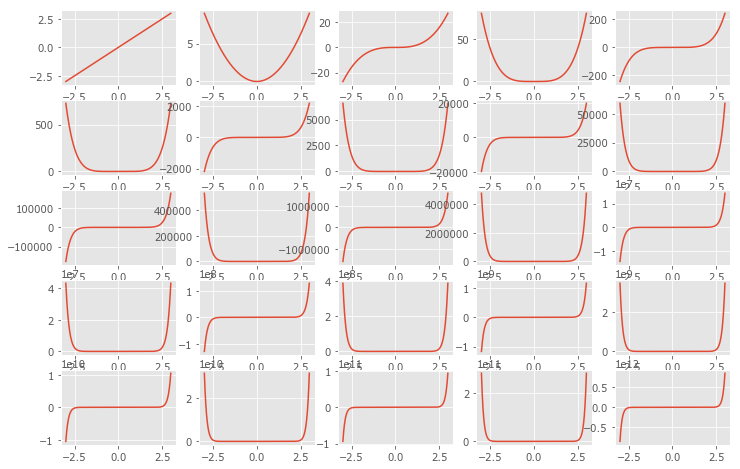

In [31]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    #plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

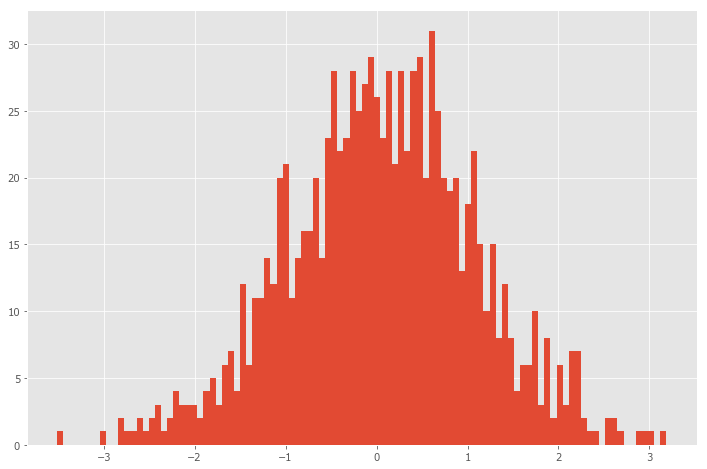

In [32]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (0.5 балла код + 0.5 балла выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них sample, используйте вектоизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

### Начнем выполнять задание по пунктам. Пункт 1.

In [33]:
#это я создала датасет, включающий только объекты из обучающей выборки 
td_train = pd.DataFrame(X_train)
td_train.insert(0, 'class', y_train)
td_train.head()

,class,0,1,2,3,4,5,6,7,8,...,182,183,184,185,186,187,188,189,190,191
0,71,0.000000,0.000000,0.070312,0.136720,0.005859,0.000000,0.000000,0.000000,0.001953,...,0.038086,0.000000,0.002930,0.00000,0.017578,0.0,0.000000,0.000977,0.000977,0.000977
1,78,0.003906,0.001953,0.058594,0.048828,0.005859,0.017578,0.000000,0.000000,0.048828,...,0.175780,0.000977,0.005859,0.00000,0.006836,0.0,0.010742,0.000000,0.011719,0.000000
2,98,0.019531,0.031250,0.001953,0.005859,0.003906,0.013672,0.033203,0.000000,0.011719,...,0.009766,0.000000,0.000000,0.00293,0.024414,0.0,0.000000,0.006836,0.000000,0.004883
3,25,0.052734,0.140630,0.000000,0.003906,0.000000,0.117190,0.013672,0.000000,0.007812,...,0.022461,0.000000,0.002930,0.00000,0.003906,0.0,0.000000,0.009766,0.002930,0.000000
4,32,0.009766,0.031250,0.072266,0.005859,0.017578,0.042969,0.041016,0.005859,0.000000,...,0.117190,0.000000,0.000977,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.003906


In [34]:
len(td_train)

792

In [35]:
_, indices = np.unique(y_train, return_index=True)
X_train_new = X_train[indices]
y_train_new = y_train[indices]

In [36]:
_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [37]:
indices

array([343, 188,   8,  20,   6, 163,  74,  12,  10,  99, 206,  34,  51,
        90, 172,  24,  17,  25, 349,  62,  98,  46,  49,  45,  54,   3,
        87,  26, 161, 116,  22, 247,   4,  93,  79, 217,  32,  86, 244,
        78, 195, 121,   7,  43,  19, 180,  52,  42,  73,  68, 112,  33,
       190,  35,  15, 201,  14, 153, 301,  91,  29, 117,  27, 147, 100,
        41,  16, 129, 369,  75,  11,   0, 144,   9,  89,  60, 146, 126,
         1,  44,  66, 118,   5, 113,  65, 199, 210,  40,  80, 115, 105,
       148,  31, 179,  81,  59, 149,  30,   2])

### В следующей ячейке мы (Юххууу!) получили матрицу из листиков каждого класса. Зачем-то.

In [38]:
ltr_unique = pd.DataFrame()
for ind in indices:
    ltr = td_train[ind:ind+1]
    ltr_unique = pd.concat([ltr_unique, ltr])
ltr_unique.head()

,class,0,1,2,3,4,5,6,7,8,...,182,183,184,185,186,187,188,189,190,191
343,0,0.001953,0.000000,0.017578,0.013672,0.027344,0.000000,0.009766,0.000000,0.007812,...,0.037109,0.0,0.009766,0.000000,0.019531,0.0,0.0,0.000000,0.012695,0.000000
188,1,0.000000,0.000000,0.000000,0.025391,0.041016,0.000000,0.015625,0.000000,0.000000,...,0.187500,0.0,0.000977,0.003906,0.000000,0.0,0.0,0.035156,0.000000,0.005859
8,2,0.023438,0.019531,0.015625,0.027344,0.003906,0.025391,0.007812,0.000000,0.000000,...,0.148440,0.0,0.017578,0.001953,0.001953,0.0,0.0,0.000000,0.000000,0.013672
20,3,0.009766,0.033203,0.037109,0.003906,0.009766,0.015625,0.041016,0.005859,0.000000,...,0.002930,0.0,0.010742,0.000000,0.026367,0.0,0.0,0.005859,0.000000,0.034180
6,4,0.000000,0.000000,0.001953,0.064453,0.068359,0.000000,0.000000,0.000000,0.031250,...,0.005859,0.0,0.158200,0.000000,0.002930,0.0,0.0,0.000000,0.000000,0.010742


In [39]:
len(ltr_unique)

99

### Сейчас будет вообще ни разу не правильно, но что поделать. Ну или норм. 

In [40]:
#создам список из 99 листочков разных классов
leaves = []
for ind in indices:
    for p in pictures:
        if p[:-4] == str(ind+1):
            filepath = os.path.join(IMG_DIR, p)
            leave = plt.imread(filepath)
            leave_resized = imresize(leave, (100, 100))
            leaves.append(leave_resized)

In [41]:
len(leaves)

99

# Я уже голову сломала, почему в итоге получается 98 листиков. Но вроде починила. 

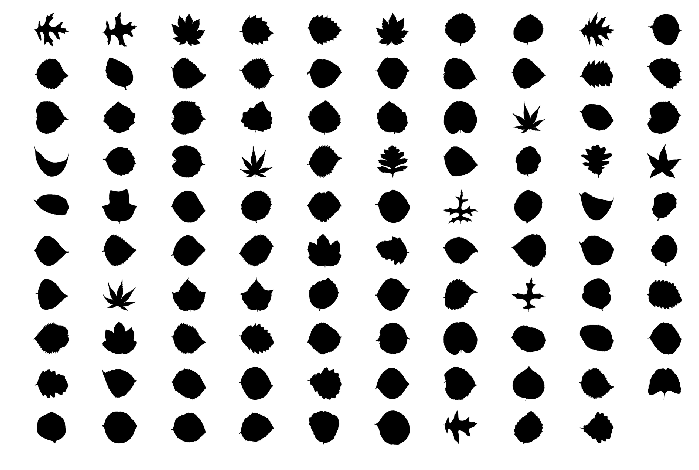

In [42]:
for i in range(0, 99):
    plt.subplot(10, 10, i+1)
    plt.imshow(leaves[i], cmap='Greys')
    plt.axis("off")

### Пункт 2. 

Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них sample, используйте вектоизацию)

In [43]:
n_pixels = 100 * 100
sample = np.array(leaves).reshape(-1, n_pixels)[:, np.random.choice(np.arange(n_pixels), 100)]

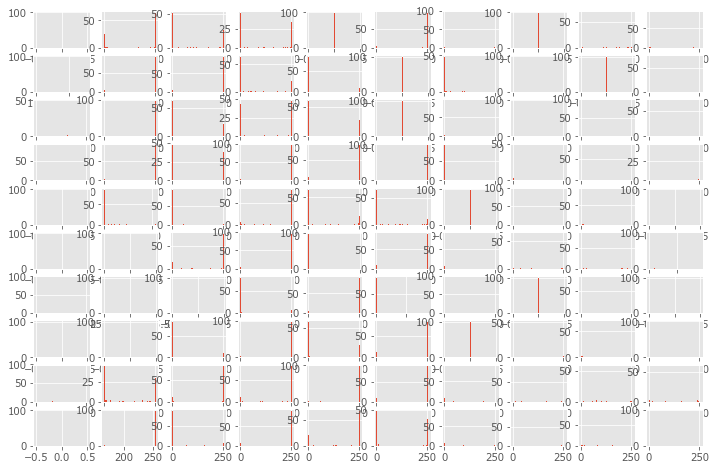

In [44]:
for i in range(0, 100):
    plt.subplot(10, 10, i+1)
    plt.hist(sample[:, i], bins=100)  #bins можно варьировать
    #plt.axis("off")

### Пункт 3. 

Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

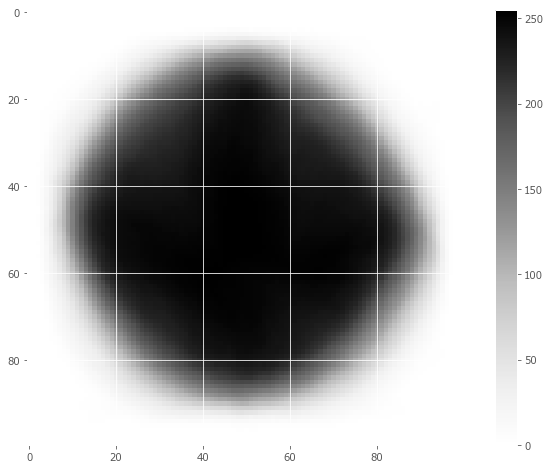

In [45]:
#рисуем средний лист
plt.imshow(np.array(imgs_train).mean(axis=0).reshape(100, 100), cmap='Greys')
plt.colorbar()

In [46]:
np.array(imgs_train).shape

(792, 10000)

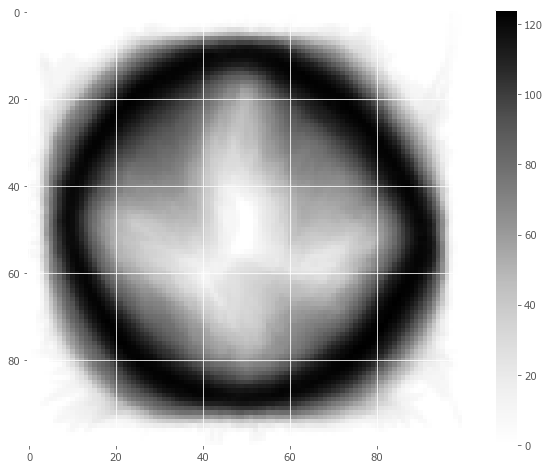

In [47]:
#рисуем разброс каждого пикселя
plt.imshow(np.array(imgs_train).std(axis=0).reshape(100, 100), cmap='Greys')
plt.colorbar()

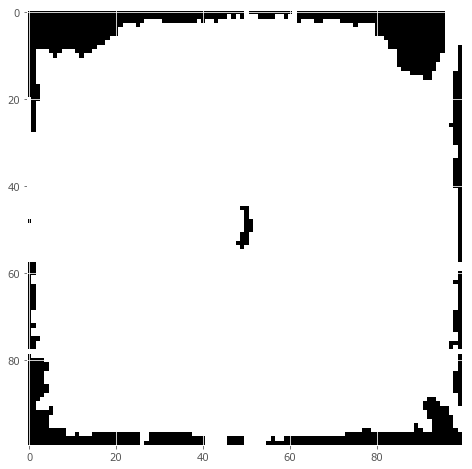

In [48]:
#а вот это помогает оценить количество константных пикселей, надо смотреть на черное
plt.imshow(np.array(imgs_train).std(axis=0).reshape(100, 100) == 0, cmap='Greys')

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

### Ответы на вопросы:

1) Отличить можно, но далеко не всегда. Количество классов, заметных невооруженным глазом, явно меньше 99. Выделить группы похожих классов можно, причем очень легко, потому что некоторые листья действительно почти не отличаются внешне. Например, лист с координатами (4,4) очень похож на лист с координатами (5,3) или лист (9,1) похож на (3,7).

Думаю, одна из главных причин такой однородности (для человеческого глаза) является масштабирование. Можем проверить это прямо сейчас.

In [49]:
lvs = []
for ind in indices:
    for p in pictures:
        if p[:-4] == str(ind):
            filepath = os.path.join(IMG_DIR, p)
            leave = plt.imread(filepath)
            lvs.append(leave)

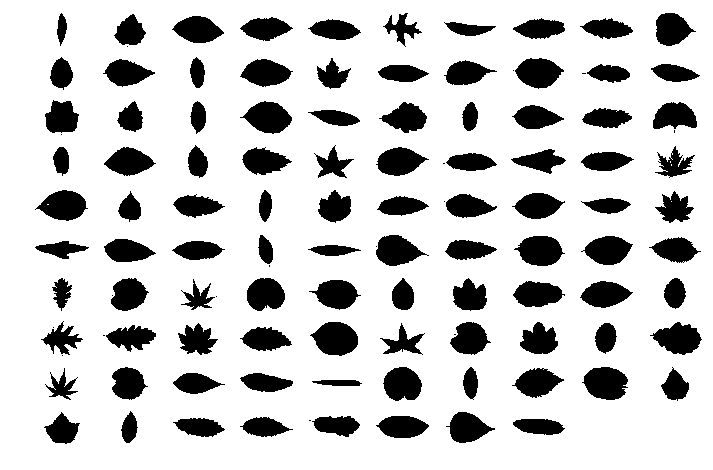

In [50]:
for i in range(0, 98):
    plt.subplot(10, 10, i+1)
    plt.imshow(lvs[i], cmap='Greys')
    plt.axis("off")

Действительно, отличать стало легче. Но все равно есть примеры, когда лично я затруднилась бы в выборе класса.

2)Максимальное значение - 255, минимальное - 0. Множество значений: от 0 до 255. Признаки чаще всего принимают эти же значения: 0 и 255, при этом 255 чаще. Про распределения хз как отвечать. Но наверное надо сказать, что если мы рассматриваем в качестве признака пиксель, то распределение зависит от его координат. То есть один пиксель, например, очень часто принимает значение 0, но иногда, допустим, 4, 8, 37, а другой почти всегда принимает значение 255, но изредка 240, 109, 185. Строго говоря, это противоположные ситуации. Но если мы посмотрим на распределение, то оно будет выглядеть так: пик в виде значения 0 или 1, а дальше спад в пользу других значений. Я хочу сказать, что с этой точки зрения распределение будет похожим.

In [51]:
#ищем минимум и максимум
arr = np.array(imgs_train)
np.min(arr), np.max(arr)

(0, 255)

In [52]:
#множество значений
np.unique(arr)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [53]:
#а это про то, как часто встречается каждое значение
np.unique(arr, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

3) На гистограмме ниже видно, что бинаризовать однозначно можно. Что касается порога, то я бы нашла середину: 128 (но так как у нас начинается с 0, то наверное 127) и все, что меньше этого значения, относила к 0, а что больше - к 1.

In [54]:
256//2

128

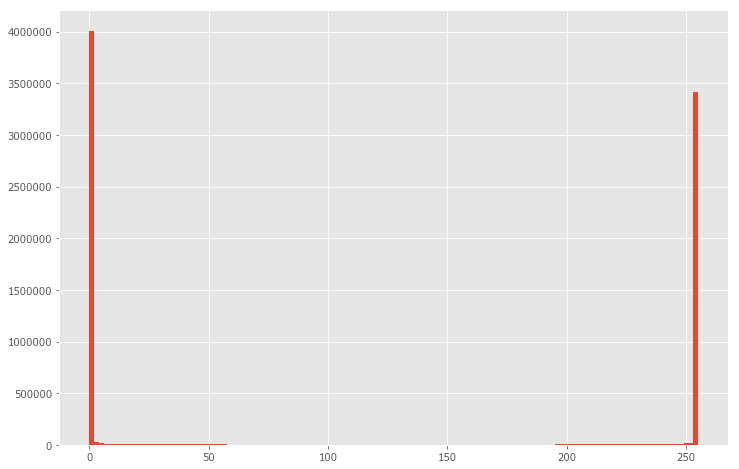

In [55]:
#нарисуем гистограммку
plt.hist(arr.reshape(-1), bins=128);

4)Средний лист отдаленно напоминает обычный. В первый раз у меня получилась совсем другая картинка, поэтому, поверьте, тот средний лист, который есть сейчас похож на лист. Представим, что мы вручную накладываем листья один на другой. Так как они разной формы, то те, которые шире, закроют собой более узорчатые и узкие, вследствие чего мы приблизимся примерно к той картинке, что получилась.

Но в то же время, не имея другой информации кроме картинки, трудно было бы понять, что это именно лист. Все-таки значения усредняются, да и картинки приведены к одинаковому размеру. В итоге получается, что продольные листья становятся похожи на круг, а это ведет к тому, что так как листьев такой формы заметно больше, чем других, например, узорчатых, они тянут среднее к себе, заставляя его принимать близкую к свой форму.

# До меня только сейчас дошло, что если сверху все правильно, то у меня уже целых 3 балла!!! (я думала, что 1)

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Запустите t-SNE на обучающей выборке (если долго считается, берите меньше объектов) и визуализируйте с цветовым указанием классов. Выведите легенду цветов.
* Затем повторите предыдущий шаг с треми различными параметрами [расстояния Минковского](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html): p=2 (это евклидово расстояние, оно установлено по умолчанию), p=1 и p=np.infty. 

In [56]:
from sklearn.manifold import TSNE

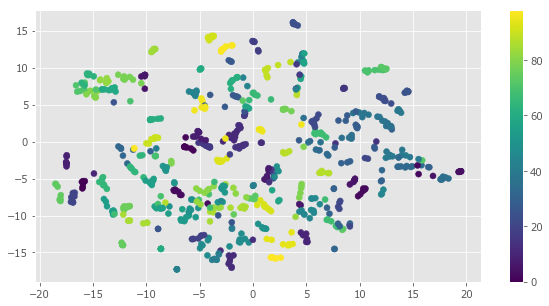

In [57]:
tsne = TSNE(n_components=2, n_iter=5000, learning_rate=500)
points = tsne.fit_transform(X_train)
plt.figure(figsize=(10, 5))
plt.scatter(points[:, 0], points[:, 1], c=y_train)
plt.colorbar()

### Тут я подумала о том, что совершаю ошибку и вместо X_train надо использовать сами картиночки. А, ну и в конфе об этом писали. Но версию с X_train удалять не хочу, пусть повисит. Ну вообще наверное и так и так можно, но не буду выделываться и сделаю как ответили в конфе.

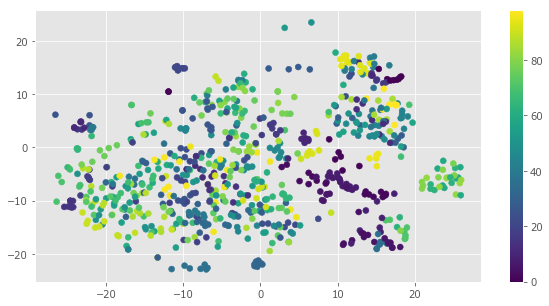

In [58]:
#пробуем заменить X_train на imgs_train
tsne = TSNE()
points = tsne.fit_transform(imgs_train)
plt.figure(figsize=(10, 5))
plt.scatter(points[:, 0], points[:, 1], c=y_train)
plt.colorbar()

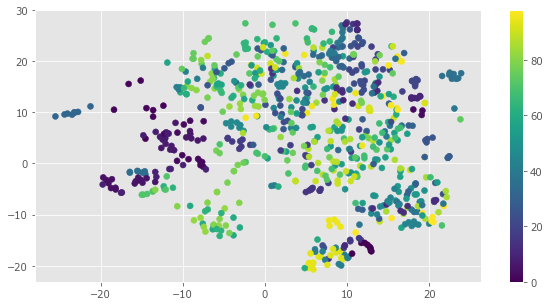

In [59]:
#p=1
tsne = TSNE(metric='manhattan')
points = tsne.fit_transform(imgs_train)
plt.figure(figsize=(10, 5))
plt.scatter(points[:, 0], points[:, 1], c=y_train)
plt.colorbar()

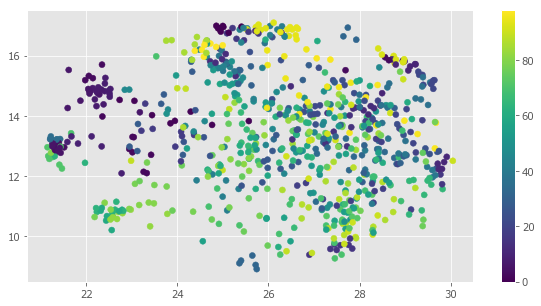

In [60]:
#p=np.infty
tsne = TSNE(metric='chebyshev')
points = tsne.fit_transform(imgs_train)
plt.figure(figsize=(10, 5))
plt.scatter(points[:, 0], points[:, 1], c=y_train)
plt.colorbar()

### Воот. Такие дела. 

Ответьте на вопросы:
* Хорошо ли разделяются классы на визуализации? 
* Можно ли выделить группы похожих классов по визуализации? Если да, то похожи ли они на те, которые вы выделяли в предыдущей секции вопросов?
* С каким параметром расстояния Минковского визуализация получается лучше всего? Предположите, почему (для этого надо разобраться, как работает расстояние с p=1 и p=бесконечность применительно к картинкам)

### Ответы на вопросы: 

1) Вообще это как-то сложно, работать с визуализацией 99(!) классов. Человеческий взгляд вряд ли так хорошо распознает оттенки цветов, чтобы эта задача была простой. Наверное хорошо, потому что точки одного цвета, если я правильно вижу, что это все-таки не разные оттенки, находятся рядом, при этом некоторые собираются в кластер и находятся далеко от других. Но думаю, что можно бы и получше разделить. Если только их будет поменьше.

И мне кажется, что с X_train все-таки лучше получалось. Обособленные группы точек принадлежат одному классу, а разве не этого мы добиваемся?

2) Я все время забываю, что мы должны смотреть на цвета точек, а не на их расположение. Кажется, ответ на первый вопрос: да, аргумент: потому что я так вижу, но это визуализация, так что наверное все окей. Но вообще я не очень понимаю, как выбираются цвета, потому что может быть "похожие классы" != "классы похожих цветов", а они специально используют контрастные цвета, чтобы не сливалось. В общем я запуталась.

3) Да это уже математика какая-то((( Че так сложно. Я все еще думаю, что на первой картинке лучшее разбиение, потому что есть много обособленных "червячков", состоящих из точек одного цвета.

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

In [61]:
from sklearn.cluster import KMeans

In [62]:
km = KMeans(n_clusters=9)
clust = km.fit_transform(np.array(imgs_train))
print(clust)

[[ 13470.88251533  13634.96008713   8277.43005249 ...,  11795.3765007
   14503.76469878  13511.32906388]
 [ 10166.18844835   9856.40879706   8353.78956422 ...,   8849.60549047
   11454.86167788   9585.54822201]
 [  5569.989442     7893.10175421  11277.65203685 ...,   8753.74875807
    8193.71488176   9243.92909279]
 ..., 
 [  8343.28800544   8805.11530335   9597.24489421 ...,   4987.4280476
    7816.82262873   9094.00723169]
 [ 10928.76374059  11518.95524642  10423.99964996 ...,  10997.57227533
   12544.78434327  11500.0302603 ]
 [  5740.50235219   8261.71030023  10334.05066423 ...,   8421.72604742
    8949.29911206   9002.88946957]]


In [63]:
clust.shape

(792, 9)

In [64]:
cc = km.cluster_centers_

In [65]:
cc

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [66]:
cc.shape

(9, 10000)

In [67]:
cc = cc.reshape((9, 100, 100))

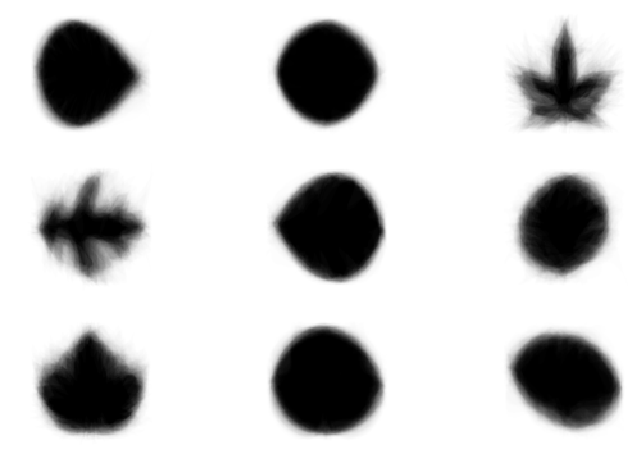

In [68]:
for i in range(0,9):
    plt.subplot(3, 3, i+1)
    plt.imshow(cc[i], cmap='Greys')
    plt.axis("off")

# С УМА СОЙТИ!!! НОРМАЛЬНЫЕ ЛИСТИКИ!!! МОЖЕТЕ СЕБЕ ПРЕДСТАВИТЬ???

### Повторим для 25 кластеров. 

In [69]:
km = KMeans(n_clusters=25)
clust = km.fit_transform(np.array(imgs_train))

In [70]:
cc_25 = km.cluster_centers_

In [71]:
cc_25.shape
cc_25 = cc_25.reshape((25, 100, 100))

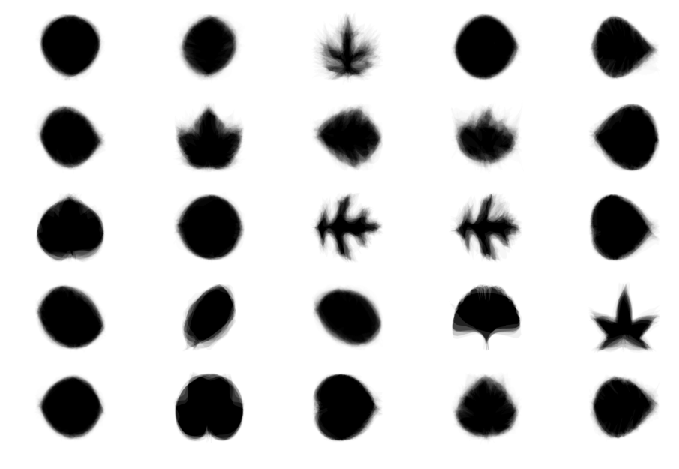

In [72]:
for i in range(0,25):
    plt.subplot(5, 5, i+1)
    plt.imshow(cc_25[i], cmap='Greys')
    plt.axis("off") # отключить оси

### Повторим для 100 кластеров. 

In [73]:
km = KMeans(n_clusters=100)
clust = km.fit_transform(np.array(imgs_train))

In [74]:
cc_100 = km.cluster_centers_
cc_100.shape
cc_100 = cc_100.reshape((100, 100, 100))

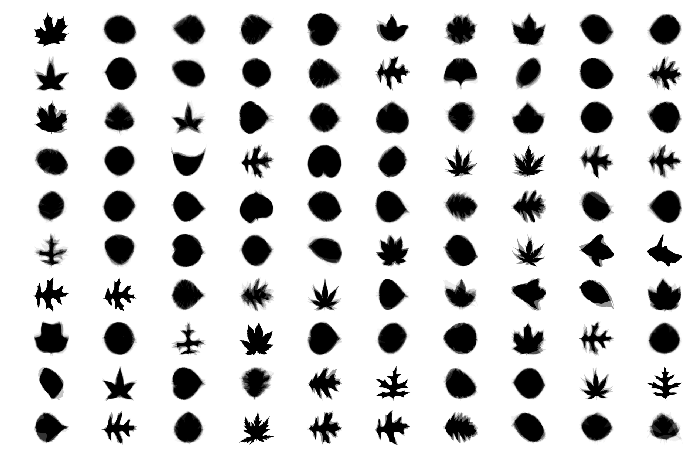

In [75]:
for i in range(0,100):
    plt.subplot(10, 10, i+1)
    plt.imshow(cc_100[i], cmap='Greys')
    plt.axis("off")

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

### Ответы на вопросы.

1) Да, очень похожи, я чуть ли от счастья не прыгала (и удивления).

2) Например, они размытые, а сами картинки нет. Это происходит из-за усреднения. Мы уже видели, что на картинках пиксели принимают значения 0 и 255, то есть по сути они бинарные. Если мы усредняем, то мы меняем значение пикселя. Допустим, пиксель очень часто принимает значение 0. Так как несколько раз он принимал значение не 0, его значение усреднится и в итоге сместится, то есть вряд ли будет равно 0. Следовательно, так как таких пикселей будет много, мы получим размытую картинку.

3) Среди кластеров есть похожие. И чем больше мы делаем кластеров, тем больше листов можно объединить в один класс. Посмотрим на картинки центров кластеров. Обратимся к первой. Для удобства я ее выведу снова в ячейке ниже. Лист с координатами (2,1) похож на повернутый на 180 градусов лист (1,2), а лист (3,1) похож на круг, так же, как и лист (3,3). Что касается повторяющихся, то возможно они есть. Изначально было сказано, что у нас 99 классов, то есть на картинке 10х10 есть как минимум 2 центра одинаковых кластеров. А "возможно" я сказала, потому что очень приблизительно понимаю, как листья разных деревьев отличаются и сколько классов мог бы выделить неподготовленный человек.

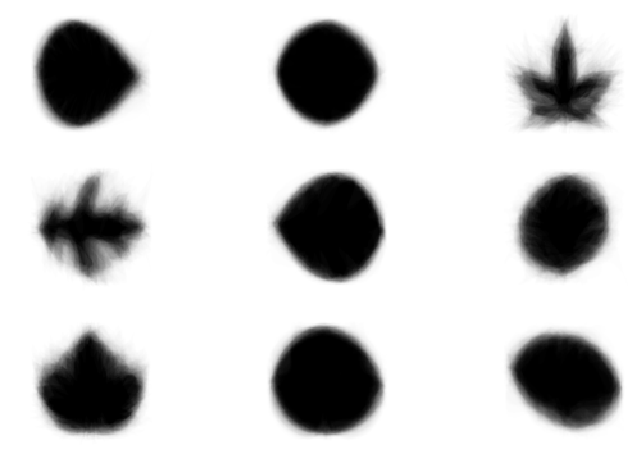

In [76]:
for i in range(0,9):
    plt.subplot(3, 3, i+1)
    plt.imshow(cc[i], cmap='Greys')
    plt.axis("off")

4) Уфф. Точно меньшее, чем предлагается. Пойду-ка я гляну на часть "Визуализация", там мы выводили по листу от каждого класса. Наверное штук 6. Это вполне сочетается с тем, что я написала в ответ на предыдущий пункт.

__Бонус 1 (1 доп. балл)__

Повторите кластеризацию с другими метриками, рассмотренными в разделе Визуализация. Отличаются ли результаты? 

In [77]:
#в конфе сказали использовать DBSCAN
from sklearn.cluster import DBSCAN

Метрики, которые нам нужны помимо евклидовой: 'manhattan' и 'chebyshev'

In [124]:
db = DBSCAN()
clust = db.fit_predict(np.array(imgs_train))
print(clust)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1

### Что-то как-то совсем неясно, как это делать, если тут нет fit_transform... 

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (0.5 балла код + 0.5 балла выводы)
Настройте 3 классификатора и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распрделение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется параметр feature_log_prob_ - это оцененный по данным логарифм вероятности $P(x_i|y)$. Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [78]:
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [79]:
#центроидный классификатор
nc = NearestCentroid()
nc.fit(imgs_train, y_train)
expected = y_test
predicted = nc.predict(imgs_test)
accuracy = metrics.accuracy_score(expected, predicted)
print('Доля правильных ответов:', accuracy)

Доля правильных ответов: 0.550505050505


In [80]:
cc = nc.centroids_
cc.shape

(99, 10000)

In [81]:
cc = cc.reshape((99, 100, 100))

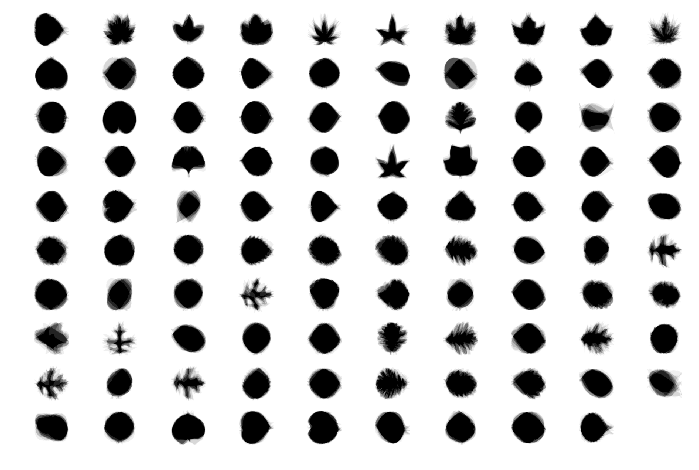

In [82]:
for i in range(0,99):
    plt.subplot(10, 10, i+1)
    plt.imshow(cc[i], cmap='Greys')
    plt.axis("off") # отключить оси

In [83]:
#мультиномиальный наивный байес
mnb = MultinomialNB()
mnb.fit(np.array(imgs_train), y_train)
expected = y_test
predicted = mnb.predict(imgs_test)
accuracy = metrics.accuracy_score(expected, predicted)
print('Доля правильных ответов:', accuracy)

Доля правильных ответов: 0.510101010101


In [84]:
cc_mnb = mnb.feature_log_prob_
cc_mnb.shape

(99, 10000)

In [85]:
cc_mnb = cc_mnb.reshape((99, 100, 100))

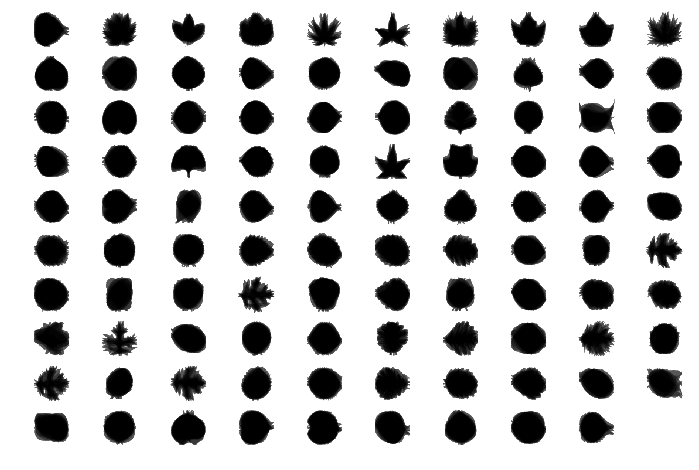

In [86]:
for i in range(0,99):
    plt.subplot(10, 10, i+1) 
    plt.imshow(cc_mnb[i], cmap='Greys')
    plt.axis("off")

In [87]:
#логистическая регрессия
lr = LogisticRegression()
lr.fit(np.array(imgs_train), y_train)
expected = y_test
predicted = lr.predict(np.array(imgs_test))
accuracy = metrics.accuracy_score(expected, predicted)
print('Доля правильных ответов:', accuracy)

Доля правильных ответов: 0.585858585859


In [88]:
#это я проверила, меняется ли что-то, если вместо imgs_test подставить np.array(imgs_test)
#не меняется
lr = LogisticRegression()
lr.fit(np.array(imgs_train), y_train)
expected = y_test
predicted = lr.predict(np.array(imgs_test))
accuracy = metrics.accuracy_score(expected, predicted)
print('Доля правильных ответов:', accuracy)

Доля правильных ответов: 0.585858585859


In [89]:
cc_lr = lr.coef_
cc_lr.shape

(99, 10000)

In [90]:
cc_lr = cc_lr.reshape((99, 100, 100))

In [1]:
for i in range(0,99):
    plt.subplot(10, 10, i+1) 
    plt.imshow(cc_lr[i])#, cmap='Greys')
    plt.axis("off")

NameError: name 'plt' is not defined

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

### Ответы на вопросы. 

1) У меня получились такие значения accuracy: 0,55 для центроидного класификатора, 0,51 для мультиномиального наивного байеса и 0,59 для логистической регрессии. Что-то они совсем как монетки, разве что логистическая регрессия чуть больше, но и она недалеко ушла. Хм, а может надо было засовывать в трэйн и тест не сами картинки, а X_train, X_test...

2)Ценры кластеров, как и визуализированные вероятности, очень похожи на изображения листьев, разве что немного размазанные. Веса тоже похожи, но не на изображения, а на листья, как если бы мы взяли ведро с водой, налили немного строительной краски, а потом окунули лист. То есть хотя мы и ушли от сходства с изображением, все равно форма листов легко различима. Хм. По сути только цвет изменился, и они стали будто немного объемными. Что если вывести их не черно-белыми, а цветными? Проверим в следующей ячейке:

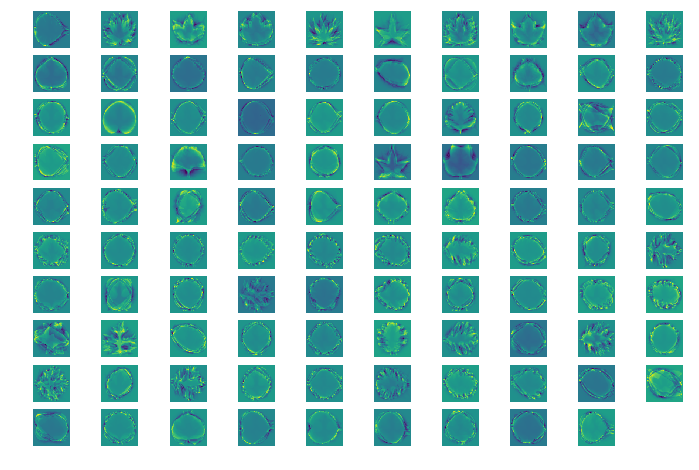

In [92]:
for i in range(0,99):
    plt.subplot(10, 10, i+1) 
    plt.imshow(cc_lr[i])
    plt.axis("off")

Симпатичненько. Но нет, на картинки больше похоже не стало.

3)Начнем с центров кластеров. В условии говорилось, что этот алгоритм работает примерно как KMeans, а значит имеет дело с усреднением. Если я правильно понимаю, то при усреднении мы рассматриваем значение пикселей, и в итоге получается что-то хорошо различимое, объясняющее, какой класс мы перед собой видим, но немного размытое. При вероятности мы наверное поступаем примерно так же. Возможно, это и не так работает, но я представляю как-то так: на обучающем подмножестве оценили, какова вероятность принять то или иное значение, а потом исходя из этого выдаем результат. Веса - это не сами пиксели, думаю, надо рассматривать это как их важность. Есть пиксели фона и они важные, а есть пиксели внутри листа, они тоже важные. Те, что на границе, весят меньше, поэтому результат другой. Ну а на самом деле я не очень знаю, это только предположения. Снова жду комментарии в лс.

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на наших данных. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier()
rfc.fit(imgs_train, y_train)
expected = y_test
predicted = rfc.predict(imgs_test)
accuracy = metrics.accuracy_score(expected, predicted)
print('Доля правильных ответов:', accuracy)

Доля правильных ответов: 0.39898989899


In [95]:
#а вот если сделать fit_transform, то качество чуть лучше, но все равно все тлен
rfc.fit_transform(imgs_train, y_train)
expected = y_test
predicted = rfc.predict(imgs_test)
accuracy = metrics.accuracy_score(expected, predicted)
print('Доля правильных ответов:', accuracy)

Доля правильных ответов: 0.414141414141


/Users/anastasiarodygina/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


### Возможно это магия, но при перезапуске ячеек  выше получаются разные значения :/
### Наверное еще выше тоже так было. Боюсь проверять, вдруг все сломалось :с

### UPD: теперь я думаю, что дело в RANDOM!!!!!! forest, что я от него хочу, он же рандомный

In [96]:
#немного порисуем
cc_rfc = rfc.feature_importances_
cc_rfc.shape

(10000,)

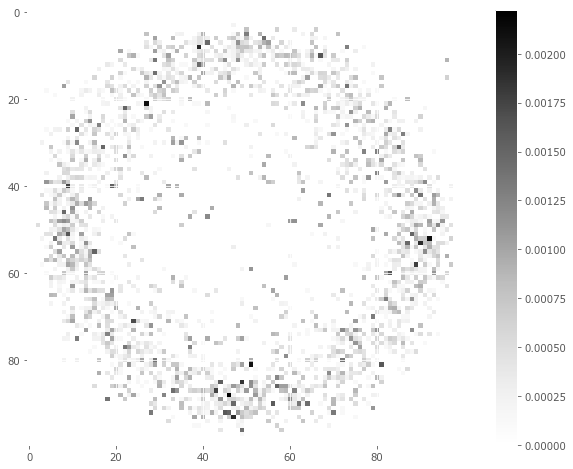

In [97]:
plt.imshow(cc_rfc.reshape(100, 100), cmap='Greys')
plt.colorbar()

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые FR определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

### Ответы на вопросы. 

1) Нет, не похожа. Похожа на график разброса каждого пикселя, который я рисовала где-то в начале

2) Чем больше feature_importances_, тем важнее (ого, нижнее подчеркивание может в курсив!)_ участок. Смотрим на легенду справа от картинки. Чем темнее пиксель, тем он важнее. Хм, ну наверное логично, что нам нужны пиксели, разброс которых большой. Потому что константные есть абсолютно у всех и это никак не поможет определить класс. Нужны отличительные черты. То есть ответ на вопрос: скорее да. Фон, который алгоритм определяет как незначимый, действительно ни о чем не говорит. То же касается и внутренней части листа.

### Другой наивный байесовский классификатор (0.25 балла код + 0.25 балла выводы)
* В разделе Простая визуализаия вы пидумали порог, по которому можно бинаризовать картинки. Выполните эту бинаризацию и настройте BernoulliNB, выведите качество на контроле.
* Визуализируйте вероятности.

In [98]:
arr[0][0]

0

In [99]:
bin_train = np.array(imgs_train)
bin_test = np.array(imgs_test)

In [100]:
for a in bin_train:
    for i in a:
        if i <= 127:
            i = 0
        if i > 127:
            i = 1
for a in bin_test:
    for i in a:
        if i <= 127:
            i = 0
        if i > 127:
            i = 1

In [101]:
from sklearn.naive_bayes import BernoulliNB

In [109]:
bnb = BernoulliNB()
bnb.fit(bin_train, y_train)
expected = y_test
predicted = rfc.predict(bin_test)
accuracy = metrics.accuracy_score(expected, predicted)
print('Доля правильных ответов:', accuracy)

Доля правильных ответов: 0.414141414141


In [110]:
#тут должна начинаться визуализация
cc_bnb = bnb.feature_log_prob_
cc_bnb.shape

(99, 10000)

In [111]:
cc_bnb = cc_bnb.reshape((99, 100, 100))

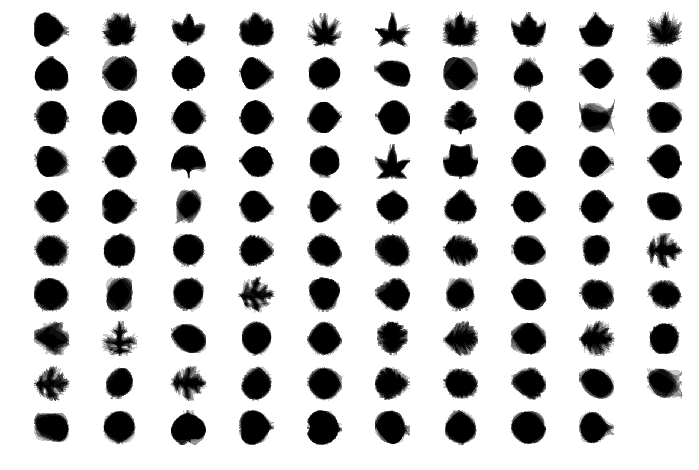

In [112]:
for i in range(0,99):
    plt.subplot(10, 10, i+1) 
    plt.imshow(cc_bnb[i], cmap='Greys')
    plt.axis("off")

Ответьте на вопросы:
* Улучшилось на качество классификации по сравнению с MultinomialNB? Как вы думаете, почему?
* Похожи ли картинки на листья?

### Ответы на вопросы. 

1) В прошлый раз, когда использовали мультиномиальный байес, доля правильных ответов была 0.51. Теперь 0,41. Вопрос о том, улучшилось качество или нет, дискуссионный. Понятно, что качество, получившееся сейчас, хуже, то есть не улучшилось. Но даже при лучшем раскладе наш алгоритм работает как монетка. Хотя подождите-ка, наверное я не права с монеткой... У нас же много классов. Но в любом случае он не очень работает. Такие пироги ¯\_(ツ)_/¯

2) Даааа, правда снова как будто пушистые немного, но вполне узнаваемы! Так что я очень рада видеть это :3

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обуении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд. После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [117]:
num_components = 2**np.arange(10)
num_components

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

In [114]:
from sklearn.decomposition import PCA

In [122]:
pca = PCA(n_components=1)
comp = pca.n_components_
comp

AttributeError: 'PCA' object has no attribute 'n_components_'

# Вот отстой(
## 20 минут до дедлайна, а он говорит AttributeError: 'PCA' object has no attribute 'n_components_'
Аррррр. Ноутбук не отображает нижние подчеркивания там, где надо

In [ ]:
for i in num_components:
    pca = PCA(n_components=i)
    comp = pca.components_
    

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

### Отбор признаков (0.5 балла код + 0.5 балла выводы)
* Обучите SelectKBest на обучающих данных. Он ранжирует признаки согласно статистическому тесту, оценивающему согласованность каждог опризнака с целевой переменной.
* Визуализруйте scores\_ как картинку 100x100.
* Оставьте 100 самых важных признаков и обучите на них логистическую регрессию. Выведите качество на контрольной выборке.

In [ ]:
from sklearn.feature_selection import SelectKBest

Ответьте на вопрос:
* Разумно ли предложенное алгоритмом ранжирование? Верно ли, что признаки, котореы он указал как неважные, действительно не помогают классифицировать листья?
* Сильно ли изменилось качество решения задачи после отбора признаков?

## 5. Hyperparameters tuning
Наконец, пришло время настроить гиперпараметры модели и получить итоговое качество. В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

### Настройка гиперпараметров случайного леса (2 балла)
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

Часто при решении задачи еще используется шестой шаг - композиции методов. Но в данном задании мы это пропустим :)

__Доп. задание (1-2 балла)__
Попробуйте придумать какие-нибудь признаки из сырых данных (картинок) или табличных и настроить на них случайный лес. Ваша цель - улучшить качество классификации по сравнению с исходными признаками.